# Dealing with Nails Outside of the SG Range of Table 12N
I've noticed that one brace assignment generated (Fall 2016) used a species (White Oak) that had a SG value (0.73) above the values in table 12N (pg 109 or 121 of 202).  This is demonstrating the linearity of the nail capacities with regard to SG values.  

Note: The values in Table 12N are supposed to be based on the equations in Table 12.3.1A (page 81 or 93 of 202).

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Table 12N Data

In [2]:
import pandas as pd
df = pd.read_csv('./Nails/Nail_table.csv')
two_by = df[df['Side Member']=='1-1/2']
brace = two_by[two_by['Common']=='16d']
brace

,Side Member,dia.,Common,Box,Sinker,0.67,0.55,0.5,0.49,0.46,0.43,0.42,0.37,0.36,0.35
1,1-1/2,0.162,16d,40d,NaN,184,154,141,138,131,122,120,106,104,101


In [3]:
sgs = list(brace.columns[5:])
SGs = [float(sg) for sg in sgs]
# print(SGs)
cap = [int(c) for c in list(brace[sgs].values[0])]
# print(cap)

In [4]:
from IPython.display import Latex
import numpy as np
m,b = np.polyfit(SGs,cap,1)
x = np.linspace(min(SGs), max(SGs))
y = m*x+b
x_proj = np.linspace(max(SGs),0.73)
y_proj = m*x_proj+b
x_fit = 0.73
y_fit = m*0.73+b

In [5]:
x_intr = 0.73
y_intr = (184-154)/(0.67-0.55)*(x_intr-0.55)+154
# print(y_intr)

# Visualization

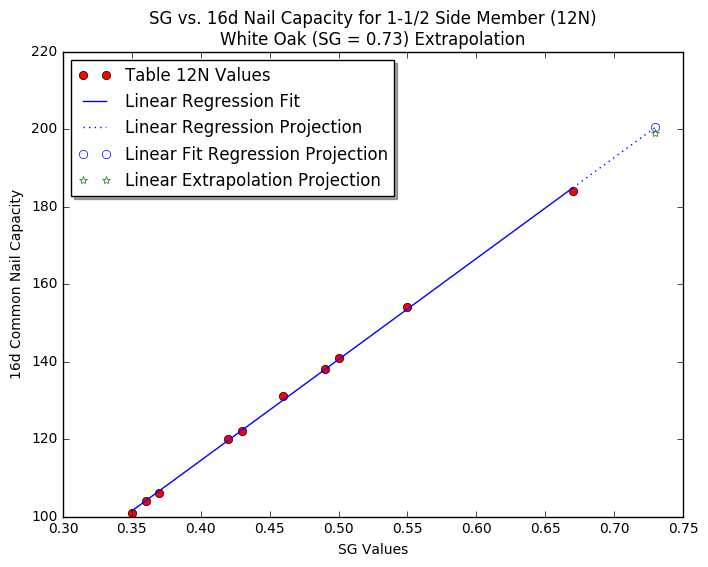

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(SGs,cap,'ro', Label='Table 12N Values')
plt.plot(x,y, label='Linear Regression Fit')
plt.plot(x_proj,y_proj, 'b', linestyle=':',label='Linear Regression Projection')
plt.plot(x_fit,y_fit, 'bo', fillstyle='none', Label='Linear Fit Regression Projection')
plt.plot(x_intr,y_intr,'g*',fillstyle='none', Label='Linear Extrapolation Projection')

plt.xlabel('SG Values')
plt.ylabel('16d Common Nail Capacity')
plt.title('SG vs. 16d Nail Capacity for 1-1/2 Side Member (12N)\nWhite Oak (SG = 0.73) Extrapolation')
plt.legend(loc='upper left', shadow=True)

## Linear Regression
[Wikipedia explanation](https://en.wikipedia.org/wiki/Linear_regression)

In [7]:
# print(y_fit)
fit = r'$$\text{Using Linear Regression}\\$$'
fit += (r'$$b = \frac{\sum_{i=1}^n x_i^2 \sum_{i=1}^n y_i  - \sum_{i=1}^n x_i'
        r' \sum_{i=1}^n x_i y_i}{n \sum_{i=1}^n x_i^2 - '
        r'\left(\sum_{i=1}^n x_i \right)^2} \\$$')
fit += (r'$$m = \frac{n \sum_{i=1}^n x_i y_i  - \sum_{i=1}^n x_i \sum_{i=1}^n'
        r' y_i}{n \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i \right)^2} \\$$')
fit += r'$$y = m\cdot x + b $$ $$\\$$ $$y= {:0.2f}\cdot{} + {:0.2f} = {:0.2f}$$'.format(m,x_fit,b,y_fit)
Latex(fit)

<IPython.core.display.Latex object>

## Linear Extrapolation
[Wikipedia example](https://en.wikipedia.org/wiki/Extrapolation#Linear)

In [8]:
intrp = r'$$y = \frac{y_i - y_{i-1}}{x_i - x_{i-1}}(x - x_{i-1})+y_{i-1}$$ $$\\$$ '
intrp += r'$$y = \frac{184-154}{0.67-0.55}(0.73-0.55)+154 = %0.1f$$'%y_intr
Latex(r' $$\text{Using Linear Extrapolation}\\$$ '+intrp)

<IPython.core.display.Latex object>

# Alternatively - NDS Table 12.3.1A Yield Limit Equations

Using the minimum $Z$ value from the following equations.

$$Z = \frac{D l_m F_{em}}{R_d}$$

$$Z = \frac{D l_s F_{es}}{R_d}$$

$$Z = \frac{k_1 D l_s F_{es}}{R_d}$$

$$Z = \frac{k_2 D l_m F_{em}}{\left(1+ 2 R_e \right)R_d}$$

$$Z = \frac{k_3 D l_s F_{em}}{\left(2+  R_e \right)R_d }$$

$$Z = \frac{D^2}{R_d}\sqrt{\frac{2 F_{em} F_{yb}}{3 \left(1+R_e \right)}}$$

Where:

$\displaystyle k_1 = \frac{\sqrt{R_e + 2 R_e^2 \left(1+R_t R_t^2 \right)+R_t^2 R_e^3}-R_e\left(1+ R_t \right)}{\left(1+R_e \right)}$

$\displaystyle k_2 = -1 + \sqrt{2\left(1+R_e \right)+\frac{2 F_yb\left(1+2R_e \right)D^2}{3 F_{em} l_m^2}}$

$\displaystyle k_3 = -1 + \sqrt{\frac{2\left(1+R_e \right)}{R_e}+\frac{2 F_yb\left(2+R_e \right)D^2}{3 F_{em} l_s^2}}$

* $D$ = diameter, in. (see 12.3.7)
* $F_{yb}$ = dowel bending yield strength, psi (Use $\mathbf{F_{yb}}$ **Requirements** in Table 3 below)
* $R_d$ = reduction term (see Table 12.3.1B)
* $R_e$ = $F_{em} /F_{es}$
* $R_t$ = $l_m / s$
* $l_m$ = main member dowel bearing length, in.
* $l_s$ = side member dowel bearing length, in.
* $F_{em}$ = main member dowel bearing strength, psi (see Table 12.3.3)
* $F_{es}$ = side member dowel bearing strength, psi (see Table 12.3.3)



<a href="http://seblog.strongtie.com/2013/10/why-your-nds-nail-calcs-could-be-wrong-and-what-you-can-do-about-it/"><img src="http://seblog.strongtie.com/wp-content/uploads/2013/10/Table-3.jpg"/></a>